# Part 2 - t-SNE on Amazon Fine Foods Review

**By Aziz Presswala**

In [1]:
#importing libraries
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from tqdm import tqdm
import os

C:\Users\Aziz\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
# Using the CleanedText column saved in final.sqlite db
con = sqlite3.connect('final.sqlite')
filtered_data = pd.read_sql_query("SELECT * FROM Reviews", con)

In [3]:
filtered_data.head(5)

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
1,138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew read sendak book watch realli rosi movi i...
2,138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,fun way children learn month year learn poem t...
3,138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,positive,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,great littl book read nice rhythm well good re...
4,138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,positive,1018396800,A great way to learn the months,This is a book of poetry about the months of t...,book poetri month year goe month cute littl po...


## Bag of Words (BoW)

In [4]:
count_vect = CountVectorizer() #in scikit-learn
final_counts = count_vect.fit_transform(filtered_data['CleanedText'].values)
print("the shape of out text BOW vectorizer ",final_counts.get_shape())

the shape of out text BOW vectorizer  (364171, 71624)


In [5]:
#selecting the first 1k values
#tried for 10k values but not working (Memory Error)
final_values = final_counts[0:1000]
final_values.toarray()
label = filtered_data['Score'][0:1000]

In [6]:
#perplexity = 80
model = TSNE(n_components=2, random_state=0, perplexity=80, n_iter=5000)
tsne_data = model.fit_transform(final_values.toarray())

In [7]:
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_data

array([[1.135949969291687, -2.169593095779419, 'positive'],
       [2.943675994873047, -1.9148491621017456, 'positive'],
       [4.540219306945801, 4.536865711212158, 'positive'],
       ...,
       [-0.5467392802238464, -2.5423057079315186, 'positive'],
       [3.2111728191375732, -1.5342339277267456, 'positive'],
       [0.13811619579792023, -1.0979485511779785, 'negative']],
      dtype=object)

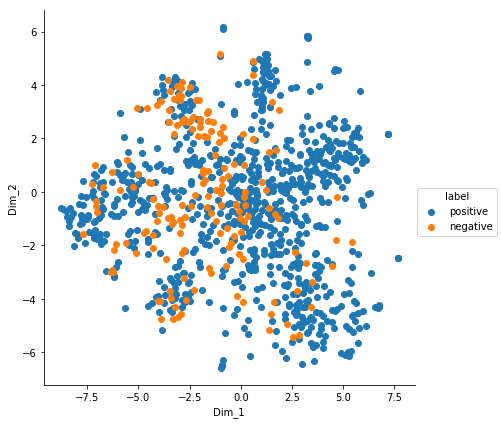

In [11]:
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [12]:
#perplexity = 60
model = TSNE(n_components=2, random_state=0, perplexity=60, n_iter=5000)
tsne_data = model.fit_transform(final_values.toarray())
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_data

array([[-4.866368770599365, -2.1437766551971436, 'positive'],
       [-4.237192630767822, -2.696587562561035, 'positive'],
       [-8.084127426147461, -1.5494660139083862, 'positive'],
       ...,
       [-0.8321120142936707, 0.5222065448760986, 'positive'],
       [-3.476917266845703, -3.0578975677490234, 'positive'],
       [-0.6171197295188904, -1.9223294258117676, 'negative']],
      dtype=object)

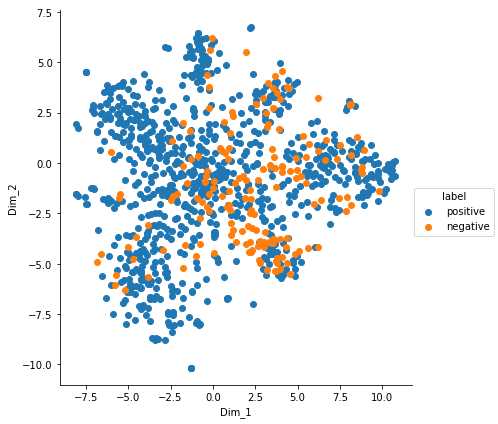

In [13]:
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [14]:
#perplexity = 150
model = TSNE(n_components=2, random_state=0, perplexity=150, n_iter=5000)
tsne_data = model.fit_transform(final_values.toarray())
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_data

array([[1.5682780742645264, -1.051674723625183, 'positive'],
       [1.9349400997161865, -1.1618131399154663, 'positive'],
       [-1.0907014608383179, -4.203751087188721, 'positive'],
       ...,
       [0.7224600911140442, 0.9180004596710205, 'positive'],
       [1.8023749589920044, 0.4079337418079376, 'positive'],
       [0.6485686898231506, -0.1206492930650711, 'negative']],
      dtype=object)

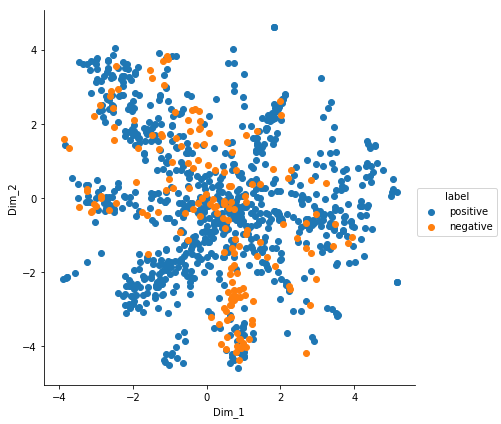

In [15]:
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

Conclusion:-
For the above plots using different perplexity values - (60,80,150), we clearly conclude that it is not possible to seperate the positive and negative review clusters from each other ie.there is a considerable overlap of the 2 clusters.

## Word2Vec

In [16]:
i=0
list_of_sent=[]
for sent in filtered_data['CleanedText'].values:
    list_of_sent.append(sent.split())

In [17]:
w2v_model=Word2Vec(list_of_sent,min_count=5,size=50, workers=4)

In [18]:
X = w2v_model[w2v_model.wv.vocab]

C:\Users\Aziz\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [19]:
label = filtered_data['Score'][5000:6000]
final = X[5000:6000]

In [20]:
#perplexity = 80
model = TSNE(n_components=2, random_state=0, perplexity=80)
tsne_data = model.fit_transform(final)
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

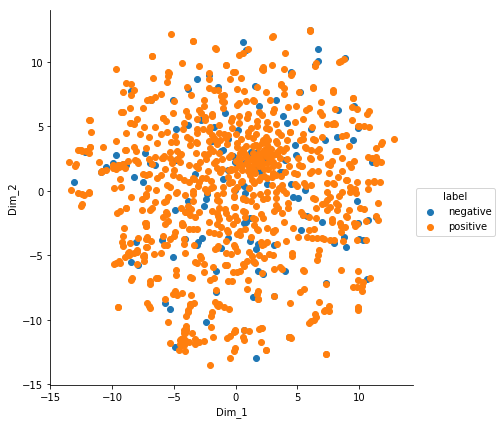

In [21]:
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [23]:
#perplexity = 150
model = TSNE(n_components=2, random_state=0, perplexity=150)
tsne_data = model.fit_transform(final)
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

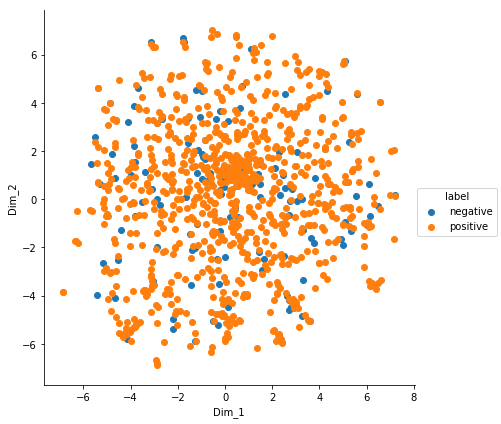

In [24]:
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [25]:
#perplexity = 200
model = TSNE(n_components=2, random_state=0, perplexity=200)
tsne_data = model.fit_transform(final)
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

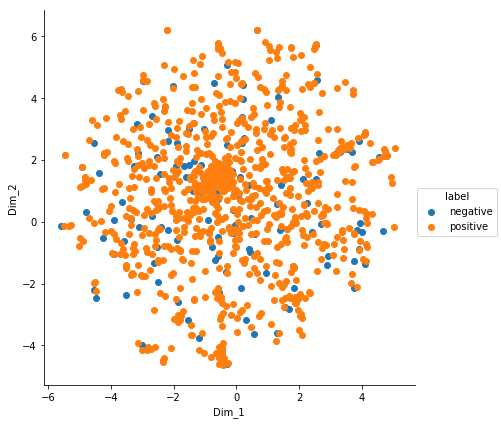

In [26]:
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [29]:
#perplexity = 20
model = TSNE(n_components=2, random_state=0, perplexity=20)
tsne_data = model.fit_transform(final)
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

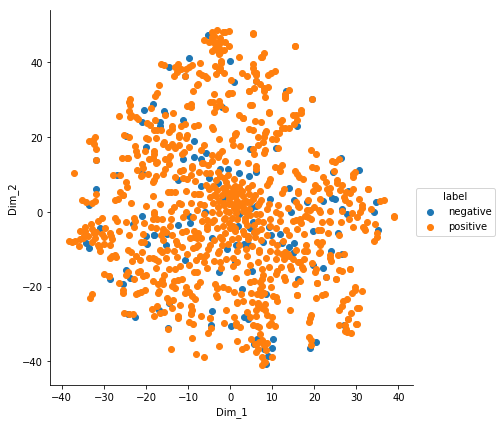

In [30]:
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

Conclusion:-
Applied t-SNE with different perplexity values - (80,150,200,20) for Word2Vec. From the plots, one can clearly observe that the 2 clusters are overlapping considerably, therefore it is difficult to visualize them seperately in a 2D Plane.

## TF-IDF

In [31]:
tf_idf_vect = TfidfVectorizer()
final_tf_idf = tf_idf_vect.fit_transform(filtered_data['CleanedText'].values)
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())

the shape of out text TFIDF vectorizer  (364171, 71624)


In [32]:
final_values = final_tf_idf[6000:7000]
label = filtered_data['Score'][6000:7000]

In [33]:
#perplexity = 100
model = TSNE(n_components=2, random_state=0, perplexity=100)
tsne_data = model.fit_transform(final_values.toarray())
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

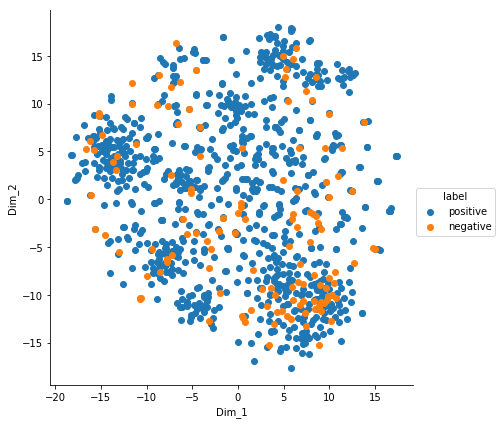

In [34]:
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [35]:
#perplexity = 60
model = TSNE(n_components=2, random_state=0, perplexity=60)
tsne_data = model.fit_transform(final_values.toarray())
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

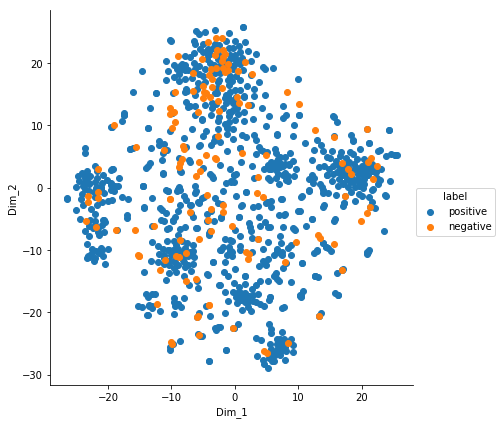

In [36]:
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [37]:
#perplexity = 150
model = TSNE(n_components=2, random_state=0, perplexity=150)
tsne_data = model.fit_transform(final_values.toarray())
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

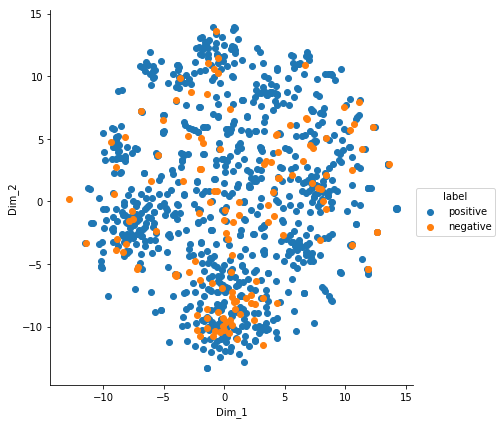

In [38]:
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

Conclusion:-
From the above plots, one can conclude that it is not possible to visualize the 2 clusters seperately in 2D plane without considerable overlap.

## Average Word2Vec

In [39]:
w2v_words = list(w2v_model.wv.vocab)
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sent): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

100%|█████████████████████████████████| 364171/364171 [50:48<00:00, 119.45it/s]


364171
50


In [41]:
vector = np.array(sent_vectors)
vector.shape

(364171, 50)

In [42]:
# randomly selecting 1k values
final = vector[7000:8000]
label = filtered_data['Score'][7000:8000]

In [43]:
# perplexity = 50
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(final)
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

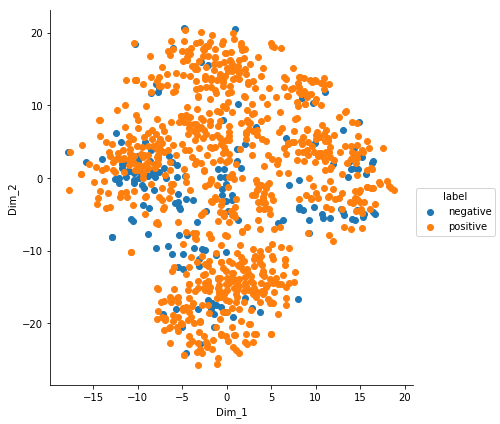

In [44]:
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [45]:
# perplexity = 80
model = TSNE(n_components=2, random_state=0, perplexity=80)
tsne_data = model.fit_transform(final)
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

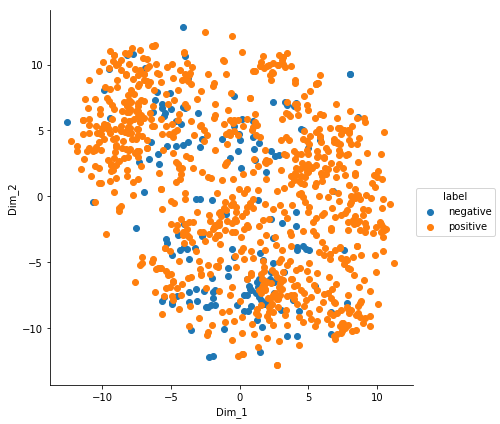

In [46]:
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [47]:
# perplexity = 120
model = TSNE(n_components=2, random_state=0, perplexity=120)
tsne_data = model.fit_transform(final)
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

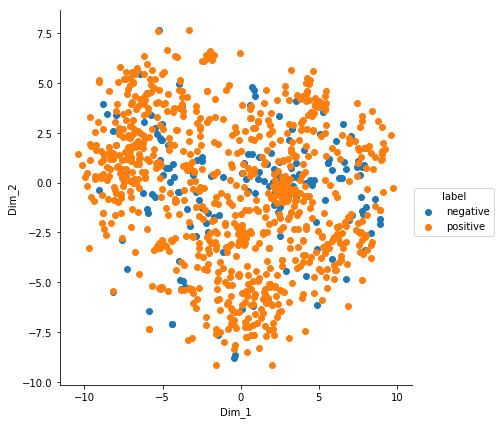

In [48]:
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

Conclusion:-
From the above plots of different perplexity values - (50,80,120), one can clearly conclude that there is considerable overlap between the 2 clusters, therefore it is difficult to visualize them seperately in 2D plane.

## Conclusion:-
Hence we have successfully implemented t-SNE using 4 different featurization methods - BoW, tfidf, Word2Vec, Avg. Word2Vec with different perplexity values for each method.